# Introdução a Aprendizado de Máquina

## Introdução

Utilizaremos a base de dados iris para esse tutorial. Essa é uma base de dados bastante conhecida contendo medidas das pétalas e sépalas da flor de íris. Os dados estão contidos em um arquivo chamado `Iris_Data.csv` encontrado no diretório [data](data).

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_path = 'data'

## Exercício 1

Carregue os dados do arquivo usando as técnicas do tutorial *Introduction_to_Machine_Learning_and_Toolkit*. Examine o arquivo.

Indique o seguinte:

* O número de pontos (linhas) (*Dica:* verifique o atributo `.shape` do dataframe.)
* O nome das colunas. (*Dica:* verifique o atributo `.columns` do dataframe.)
* Os tipos associados a cada coluna. (*Dica:* verifique o atributo `.dtypes` do dataframe.)

In [2]:
data = pd.read_csv(os.path.abspath(os.path.join(data_path, 'Iris_Data.csv')))

print(f'numero de pontos:\n{data.shape}\n')
print(f'colunas:\n{data.columns}\n')
print(f'tipos:\n{data.dtypes}\n')

numero de pontos:
(150, 5)

colunas:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

tipos:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object



## Exercício 2

Examine os nomes das espécies e note que todas elas começam com 'Iris-'. Remova essa parte do nome para tornar o nome mais curto. 

*Dica:* tem várias maneiras de fazer isso, você pode usar o [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) ou o [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html), por exemplo.

In [3]:
data['species'] = data['species'].apply(lambda x: x.replace('Iris-', ''))

data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
97,6.2,2.9,4.3,1.3,versicolor
61,5.9,3.0,4.2,1.5,versicolor
50,7.0,3.2,4.7,1.4,versicolor
126,6.2,2.8,4.8,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa


## Exercício 3

Determine:
* A quantidade de cada espécie presente na base. (*Dica:* verifique o método `.value_counts` da série.)
* A média, mediana, quantis e faixas (máximo-mínimo) para cada medida de pétala e sépala.

*Dica:* para a última parte, o método `.describe` tem mediana, mas é chamada de *50%* quantile. `.describe` não tem faixa, portanto você precisará criar uma nova entrada na tabela com `max - min`.

In [4]:
description = data.describe()
range_series = (description.loc['max'] - description.loc['min']).values
description = description.append(pd.DataFrame([range_series], ['range'], description.columns))

description

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


## Exercício 4

Calcule **para cada espécie** em um dataframe separado:

* A média de cada medida (sepal_length, sepal_width, petal_length, e petal_width).
* A mediana dessas medidas.

*Dica:* você pode usar o método [`groupby`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) do Pandas para agrupar as espécies antes de calcular as estatísticas.

Se você terminar ambos os cálculos, tente calcular a média e mediana em uma única tabela (com uma única chamada de groupby). Veja a seção da documentação [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) para algumas dicas.

In [5]:
mean_df = data.groupby('species').mean()
mean_df.columns = mean_df.columns.map(lambda x: 'mean_' + x)

median_df = data.groupby('species').median()
median_df.columns = median_df.columns.map(lambda x: 'median_' + x)

 # join both DataFrames but keep indices. https://pandas.pydata.org/pandas-docs/stable/merging.html#set-logic-on-the-other-axes
pd.concat([mean_df, median_df], axis=1, join='inner')

,mean_sepal_length,mean_sepal_width,mean_petal_length,mean_petal_width,median_sepal_length,median_sepal_width,median_petal_length,median_petal_width
species,,,,,,,,
setosa,5.006,3.418,1.464,0.244,5.0,3.4,1.50,0.2
versicolor,5.936,2.770,4.260,1.326,5.9,2.8,4.35,1.3
virginica,6.588,2.974,5.552,2.026,6.5,3.0,5.55,2.0


## Exercício 5

Faça um scatter plot de `sepal_length` vs `sepal_width` usando Matplotlib. Coloque um `label` nos eixos e dê um título ao gráfico.

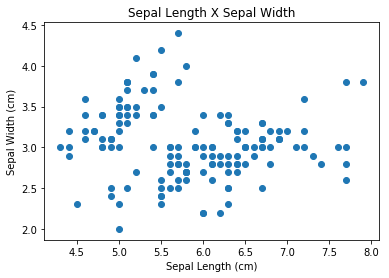

In [6]:
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length X Sepal Width")

plt.show()

## Exercício 6

Faça um histograma de qualquer um dos quatro atributos. Nomeie os eixos e dê um título apropriado.

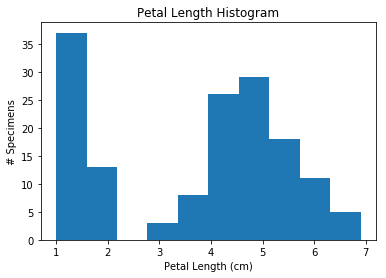

In [7]:
plt.hist(data['petal_length'])
plt.ylabel("# Specimens")
plt.xlabel("Petal Length (cm)")
plt.title("Petal Length Histogram")

plt.show()

## Exercício 7

Agora crie um único gráfico com histogramas para cada atributo (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) sobrepostos. 

Dicas para fazer isso com os métodos de plotagem do Pandas se encontram em [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html).

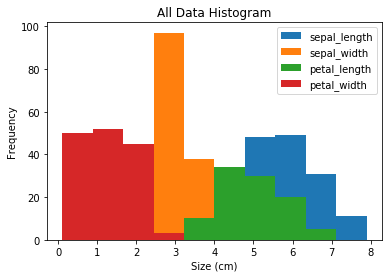

In [8]:
plt.figure()
data.plot.hist()
plt.title("All Data Histogram")
plt.xlabel("Size (cm)")

plt.show()

## Exercício 8

Usando Pandas, faça um boxplot de cada medida da pétala e sépala. Veja a documentação para algumas dicas [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

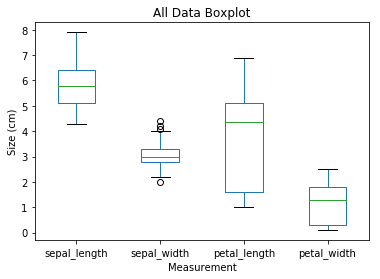

In [9]:
plt.figure()
data.plot.box()
plt.title("All Data Boxplot")
plt.ylabel("Size (cm)")
plt.xlabel("Measurement")

plt.show()

## Exercício 9

Agora faça um único boxplot onde os atributos estão separados no eixo-x e as espécies são coloridas por tons de cores diferentes.

*Dica:* veja a documentação para [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Note que o Seaborn é bem exigente quanto ao formato dos dados--para esse plot funcionar, o dataframe de entrada precisa ser manipulado para que cada linha contenha um único ponto (uma espécie, um tipo de medida e um valor da medida). Veja o Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) como uma dica.

Um exemplo desse formato para essa base:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

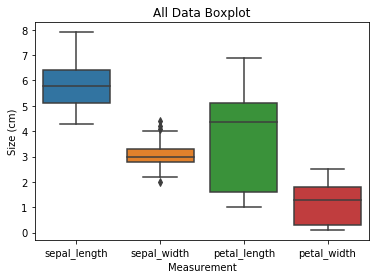

In [10]:
measurements = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
columns = ['species', 'measurement', 'size']
series = []

for idx, row in data.iterrows():
    for measurement in measurements:
        series.append(pd.Series([row['species'], measurement, row[measurement]], columns))
        
sns_data = pd.DataFrame(series)

sns.boxplot(x='measurement', y='size', data=sns_data)
plt.title("All Data Boxplot")
plt.ylabel("Size (cm)")
plt.xlabel("Measurement")

plt.show()

## Exercício 10

Faça um  [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) com o Seaborn para examinar a correlação entre cada uma das medidas.

*Dica:* esse plot pode parecer complicado, mas é na verdade uma única linha de código. Esse é o poder de expressabilidade do Seaborn junto do Pandas.

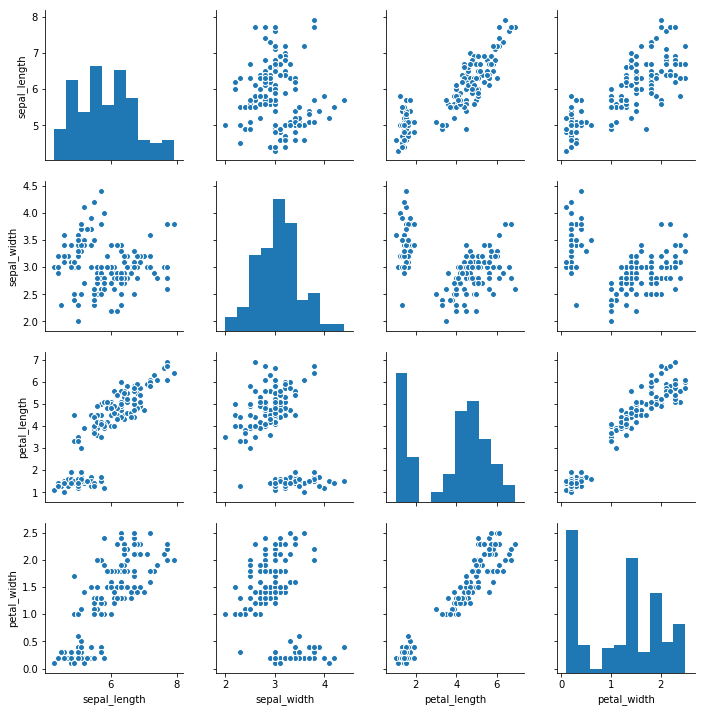

In [11]:
sns.pairplot(data)

plt.show() # Remove type print